# Explore Random Forest



Primero ejecutar en terminal: pip install -r requirements.txt

## Librerías:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
import pickle

## Datos

In [2]:
url='https://raw.githubusercontent.com/4GeeksAcademy/random-forest-project-tutorial/main/titanic_train.csv'
df = pd.read_csv(url, index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


variabes con datos faltantes: Age, Cabin y Embarked

In [4]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
df.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S
73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5000,NaN,S
93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S
319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S
481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9000,NaN,S
337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6000,C2,S
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
538,1,1,"LeRoy, Miss. Bertha",female,30.0,0,0,PC 17761,106.4250,NaN,C
509,0,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S


* Eliminamos variable "Cabin",
* Imputamos en los faltantes de Age la media
* Imputamos en los faltantes de Embarked la categoría más frecuente

In [17]:
# se elimina variable con muchos Null
df=df.drop(columns='Cabin')

In [6]:
# se imputa la media en faltantes de edad
df['Age']=df['Age'].fillna(df['Age'].mean())
# se imputa categoría más frecuente en Embarked
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


<AxesSubplot:>

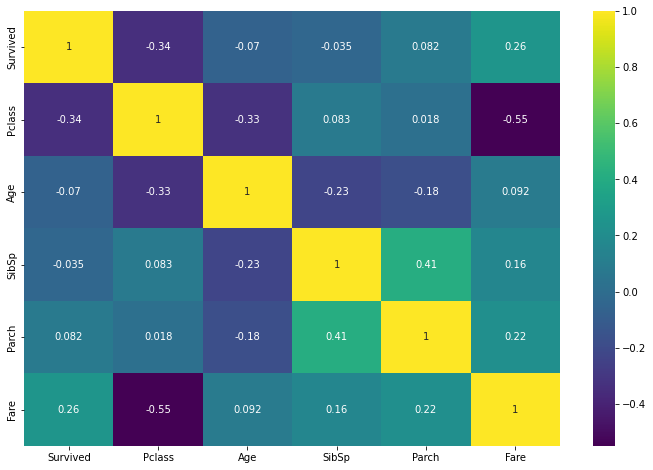

In [51]:
# correlaciones entre numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [18]:
# se separan datos en X e y
y=df['Survived']
X=df.drop(columns=['Ticket','Name','Survived'])

In [8]:
# balance de variable dependiente
y.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

No se considera desbalanceada la variable target

In [19]:
# se convierte a categórica
X[['Sex','Embarked']]=X[['Sex','Embarked']].astype('category')

In [20]:
# se recodifica para que tome valores numéricos (siguen siendo categóricas)
X['Sex']=X['Sex'].cat.codes

In [21]:
X['Embarked']=X['Embarked'].cat.codes

In [15]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.0,1,0,7.2500,2
2,1,0,38.0,1,0,71.2833,0
3,3,0,26.0,0,0,7.9250,2
4,1,0,35.0,1,0,53.1000,2
5,3,1,35.0,0,0,8.0500,2


In [22]:
# se separa en muestras de entrenamiento y evaluación
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1107)

## Estimación modelo Random Forest

Primero se estima modelo con parámetros por defecto (sin tunear)

In [23]:
classif=RandomForestClassifier(random_state=1107)

In [24]:
classif.fit(X_train,y_train)

RandomForestClassifier(random_state=1107)

In [25]:
y_pred=classif.predict(X_test)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       141
           1       0.81      0.71      0.75        82

    accuracy                           0.83       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.83      0.83      0.83       223



El modelo inicial tiene una precisión aceptable. A continuación se busca qué combinación de hiperparámetros produce el mejor resultado (mayor precisión.)

Estos son los parámetros por defecto:
* n_estimators=100
* criterion=gini
* max_depthint=None
* min_samples_splitint=2
* min_samples_leafint=1
* min_weight_fraction_leaffloat=0.0
* max_features='sqrt'
* max_leaf_nodesint=None
* min_impurity_decreasefloat=0.0
* bootstrapbool=True
* oob_scorebool=False
* n_jobsint=None
* random_stateint=None
* verboseint=0
* warm_startbool=False
* class_weight=None
* ccp_alphanon=0.0
* max_samplesint=None


In [28]:
# Number of trees in random forest
n_estimators = [100, 300, 500]
# Maximum number of levels in tree
max_depth = [10, 50, 100, None]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
#Criterion
criterion=['gini','entropy']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap,
'criterion':criterion}
print(random_grid)

{'n_estimators': [100, 300, 500], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}


In [39]:
print('Cantidad de combinaciones = ' + str(3*4*3*3*2*2))

Cantidad de combinaciones = 432


In [29]:
classif_grid=RandomForestClassifier(random_state=1107)
classif_grid_random=RandomizedSearchCV(estimator=classif_grid,n_iter=100,cv=5,random_state=1107,param_distributions=random_grid)

In [31]:
classif_grid_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1107),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 50, 100, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   random_state=1107)

Mejor bosque:

In [35]:
best_param = classif_grid_random.best_params_

In [38]:
best_param

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 100,
 'criterion': 'entropy',
 'bootstrap': True}

Estimo mejor modelo

In [39]:
# usando la mejor combinación de hiperparámetros, estimo modelo final
best_RF=RandomForestClassifier(**best_param)

In [40]:
best_RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=100, min_samples_leaf=2)

In [43]:
# usando la mejor combinación de hiperparámetros, estimo modelo final
#best_RF=RandomForestClassifier(random_state=1107, n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_depth=100, criterion='entropy', bootstrap=True)
#best_RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=100, min_samples_leaf=2,
                       random_state=1107)

Guardo mejor modelo estimado

In [45]:
filename = '../models/finalized_model.sav'
pickle.dump(best_RF, open(filename, 'wb'))